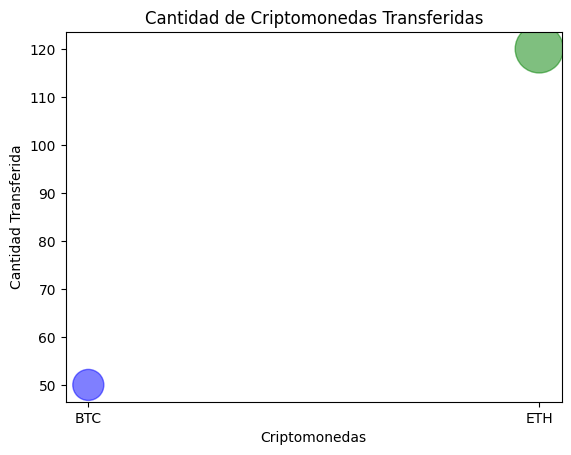

In [5]:
import matplotlib.pyplot as plt

# Datos estáticos
criptomonedas = [1, 1.5]  # Ajusta los valores del eje X para que las burbujas estén más cerca
cantidades = [50, 120]  # Cantidades de criptomonedas transferidas
tamaño_burbujas = [500, 1200]  # El tamaño de las burbujas refleja la magnitud

# Crear el gráfico de burbujas
plt.scatter(criptomonedas, cantidades, s=tamaño_burbujas, alpha=0.5, color=['blue', 'green'])

# Títulos y etiquetas
plt.title('Cantidad de Criptomonedas Transferidas')
plt.xlabel('Criptomonedas')
plt.ylabel('Cantidad Transferida')

# Etiquetas personalizadas en el eje X
plt.xticks([1, 1.5], ['BTC', 'ETH'])

# Mostrar el gráfico
plt.show()


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd

# Crear una aplicación Dash
app = dash.Dash(__name__)

# Datos de ejemplo
df = pd.DataFrame({
    "Criptomonedas": ["BTC", "ETH", "BNB", "SOL", "XRP"],
    "Cantidad": [50, 120, 70, 80, 90],
    "Cambio": [2.1, 1.2, 1.2, 6.1, 0.7]
})

# Layout de la aplicación
app.layout = html.Div(children=[
    html.H1(children='Gráfico de Burbujas de Criptomonedas'),

    # Componente de gráfico
    dcc.Graph(id='bubble-graph'),

    # Componente Intervalo para incrementar el contador cada 5 segundos
    dcc.Interval(
        id='interval-component',
        interval=1*100,  # Intervalo de 5 segundos
        n_intervals=0  # Iniciar en 0
    ),
    
    # Componente oculto para almacenar el valor del contador
    dcc.Store(id='counter', data=0),

    html.Div(id='contador-display', children='Contador: 0')
])

# Callback para incrementar el contador en cada intervalo
@app.callback(
    [Output('bubble-graph', 'figure'),
     Output('counter', 'data'),
     Output('contador-display', 'children')],
    [Input('interval-component', 'n_intervals')],
    [State('counter', 'data')]
)
def update_graph(n_intervals, counter):
    # Incrementar el contador
    counter += 1

    # Verificar si el contador ha llegado a 100
    if counter >= 100:
        # Resetear el contador
        counter = 0

        # Actualizar el gráfico
        fig = px.scatter(df, x="Criptomonedas", y="Cambio", size="Cantidad", color="Criptomonedas",
                         hover_name="Criptomonedas", size_max=100)
        fig.update_layout(title=f'Actualización del gráfico al llegar a 100 iteraciones')
    else:
        # No cambiar el gráfico, mantener el anterior
        fig = dash.no_update

    # Actualizar el contador en la pantalla
    contador_texto = f"Contador: {counter}"

    return fig, counter, contador_texto


# Ejecutar la aplicación en el servidor local
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


In [1]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Crear una aplicación Dash
app = dash.Dash(__name__)

# Datos de ejemplo
df = pd.DataFrame({
    "Criptomonedas": ["BTC", "ETH", "BNB", "SOL", "XRP"],
    "Cantidad": [50, 120, 70, 80, 90],
    "Cambio": [2.1, 1.2, 1.2, 6.1, 0.7]
})

# Gráfico de burbujas
fig = px.scatter(df, x="Criptomonedas", y="Cambio", size="Cantidad", color="Criptomonedas",
                 hover_name="Criptomonedas", size_max=100)

# Layout de la aplicación
app.layout = html.Div(children=[
    html.H1(children='Gráfico de Burbujas de Criptomonedas'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

# Ejecutar la aplicación en el servidor local
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)
